In [2]:
import pandas as pd
import re
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../../Downloads/한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding='cp949')

In [4]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [5]:
m = df['팀명'].unique()

In [6]:
m

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

In [6]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [7]:
d2 = df.groupby('팀명')['대장금액(원)'].sum()

In [8]:
max_value = df.groupby('팀명')['대장금액(원)'].sum().max()

In [9]:
max_value

1581917203990.0

In [10]:
min_value = df.groupby('팀명')['대장금액(원)'].sum().min()

In [11]:
min_value

22101960.0

In [12]:
d2

팀명
국유 안동팀            9.439484e+09
국유 충주팀            3.596089e+10
국유 포항팀            4.386039e+10
국유1팀              1.211469e+10
국유2팀              2.341540e+10
                      ...     
팀미정               6.866215e+09
평택지사              6.073721e+10
포항지부              2.784812e+10
포항지사              2.553645e+10
해안면무주지국유화지원추진단    2.210196e+07
Name: 대장금액(원), Length: 66, dtype: float64

In [13]:
team_max = d2 == max_value

In [14]:
team_max2 = d2[d2 == max_value].index.tolist()

In [15]:
print(team_max2)

['국유재산3팀']


In [16]:
team_min2 = d2[d2 == min_value].index.tolist()

In [17]:
print(team_min2)

['해안면무주지국유화지원추진단']


In [18]:
매각금액이 가장많은 팀은 '국유재산3팀'이고 매각금액이 가장 적은 팀은['해안면무주지국유화지원추진단']이다
그금액의 차이는 1581895102030.0 만큼 차이난다. 

SyntaxError: invalid syntax (3763515169.py, line 1)

In [19]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단', nan],
      dtype=object)

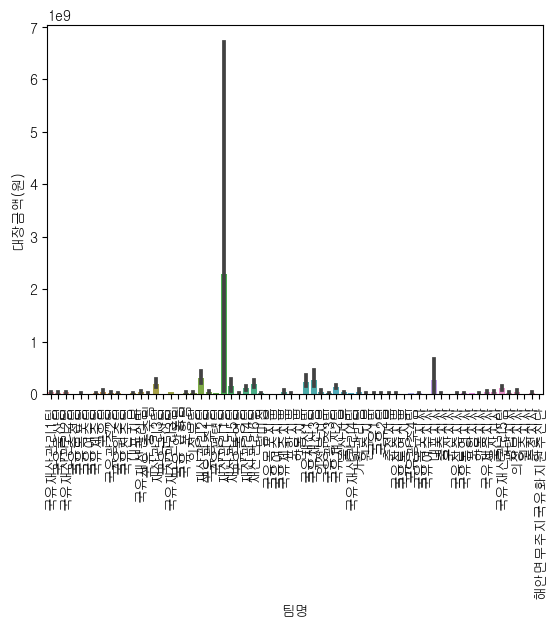

In [20]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.barplot(data = df,
             x = '팀명',y = '대장금액(원)')
plt.xticks(rotation=90)
plt .show()

In [21]:
team =df.groupby('팀명')

In [22]:
target = ['국유재산3팀','해안면무주지국유화지원추진단']
df2 = df[df['팀명'].apply(lambda x : x in target)]

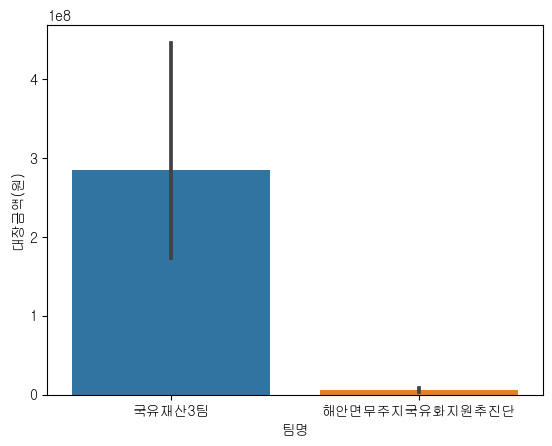

In [23]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.barplot(data = df2,
             x = '팀명',y = '대장금액(원)')
plt.xticks(rotation=0)
plt .show()

In [24]:
df.index = df['팀명']

In [25]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
팀명,,,,,,,,,,,
국유재산관리1팀,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유울산팀,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리2팀,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사


In [26]:
df.loc['국유재산3팀']

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
팀명,,,,,,,,,,,
국유재산3팀,2017,서울특별시,서울특별시 동대문구 신설동 96-22,토지,대,256.0,1.189097e+09,처분(매각입찰),2017-12-26,서울동부지역본부,국유재산3팀
국유재산3팀,2017,경기도,경기도 광주시 초월읍 용수리 545-1,토지,공장용지,468.0,1.582776e+08,처분(매각수의),2017-05-15,서울동부지역본부,국유재산3팀
국유재산3팀,2017,서울특별시,서울특별시 강동구 길동 160,토지,대,42.0,2.123273e+08,처분(매각수의),2017-06-08,서울동부지역본부,국유재산3팀
국유재산3팀,2017,경기도,경기도 광주시 직동 220,토지,임야,1474.0,2.726900e+07,처분(매각입찰),2017-08-31,서울동부지역본부,국유재산3팀
국유재산3팀,2017,경기도,경기도 광주시 쌍령동 137-1,토지,답,334.0,6.359360e+07,처분(매각입찰),2017-07-17,서울동부지역본부,국유재산3팀
...,...,...,...,...,...,...,...,...,...,...,...
국유재산3팀,2022,경기도,경기도 양평군 양동면 쌍학리 745-14,토지,도로,7.0,1.467900e+06,처분(매각수의),2022-11-28,경기지역본부,국유재산3팀
국유재산3팀,2022,경기도,경기도 양평군 양동면 매월리 1010-4,토지,전,129.0,7.288500e+06,처분(매각수의),2022-06-09,경기지역본부,국유재산3팀
국유재산3팀,2022,경기도,경기도 양평군 지평면 월산리 1736-2,토지,종교용지,85.0,1.122000e+07,처분(매각수의),2022-05-03,경기지역본부,국유재산3팀


In [27]:
a = df.loc['국유재산3팀']['대장금액(원)'].sum()

In [28]:
a

1581917203990.0

In [34]:
b

22101960.0

In [30]:
b = df.loc['해안면무주지국유화지원추진단']['대장금액(원)'].sum()

In [31]:
print(a-b)

1581895102030.0


In [32]:
plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='연도구분', ylabel='대장금액(원)'>

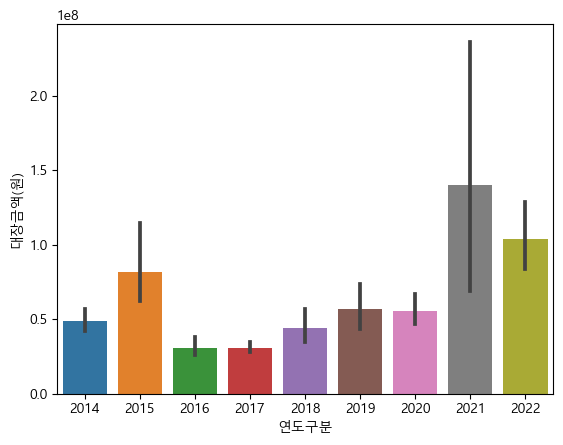

In [33]:
sns.barplot(data=df, x='연도구분',y='대장금액(원)')

135450000.0

In [35]:
df.groupby('지역구분')['대장금액(원)'].sum()

지역구분
강원도        2.649234e+11
경기도        2.014392e+12
경상남도       3.323171e+11
경상북도       2.504002e+11
광주광역시      2.625189e+11
대구광역시      2.345000e+11
대전광역시      1.256069e+11
부산광역시      5.214297e+11
서울특별시      2.915165e+12
세종특별자치시    2.992077e+10
울산광역시      1.109430e+11
인천광역시      5.385064e+11
전라남도       1.325980e+11
전라북도       1.349319e+11
제주특별자치도    5.531441e+10
충청남도       5.224144e+11
충청북도       1.439536e+11
Name: 대장금액(원), dtype: float64

In [36]:
서울특별시 경기도 인천광역시 부산광역시 충청남도 

SyntaxError: invalid syntax (3561040129.py, line 1)

In [37]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
팀명,,,,,,,,,,,
국유재산관리1팀,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유울산팀,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리2팀,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사


In [38]:
df[]

SyntaxError: invalid syntax (1951995059.py, line 1)

In [39]:
area_sum = [df.groupby('지역구분')['대장면적(제곱미터)'].sum()]

In [40]:
area_sum

[지역구분
 강원도        1.335531e+07
 경기도        1.122648e+07
 경상남도       6.281310e+06
 경상북도       7.117241e+06
 광주광역시      1.416930e+06
 대구광역시      6.432068e+05
 대전광역시      3.968756e+05
 부산광역시      3.048561e+06
 서울특별시      3.206044e+06
 세종특별자치시    2.834273e+05
 울산광역시      7.625939e+05
 인천광역시      1.794582e+06
 전라남도       9.388505e+06
 전라북도       6.720034e+06
 제주특별자치도    1.038303e+06
 충청남도       8.580610e+06
 충청북도       5.192035e+06
 Name: 대장면적(제곱미터), dtype: float64]

In [41]:
# '서울특별시','경기도', '인천광역시', '부산광역시', '충청남도'

In [42]:
c=df.groupby('지역구분')

In [43]:
df4= c.sum()

C:\Users\kpes2\AppData\Local\Temp\ipykernel_24788\1241594360.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4= c.sum()


In [44]:
df4['지역'] = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [45]:
target = ['서울특별시', '경기도', '부산광역시','인천광역시','충청남도']
df5 = df4[df4['지역'].apply(lambda x : x in target)]

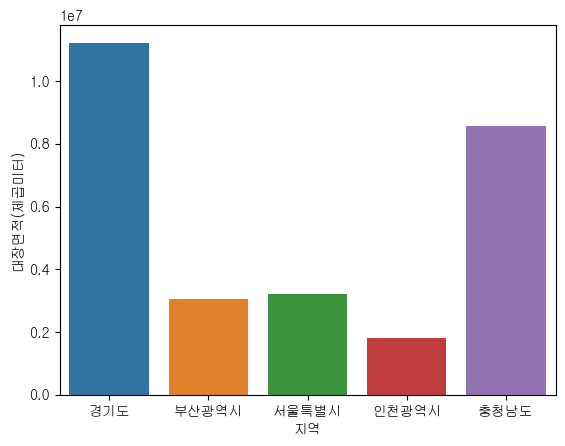

In [46]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.barplot(data = df5,
             x = '지역',y = '대장면적(제곱미터)')
plt.xticks(rotation=0)
plt .show()

In [27]:
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
팀명,,,,,,,,,,,
국유재산관리1팀,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유울산팀,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리1팀,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
국유재산관리2팀,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
국유제주지사,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사


In [28]:
df['계약일자횟수'] = df['계약일자'].value_counts()

In [42]:
value_count = [df['계약일자'].value_counts()]

In [30]:
value_count

[2017-12-01    600
 2016-11-30    504
 2022-07-25    487
 2020-04-01    442
 2019-08-29    432
              ... 
 2021-03-28      1
 2017-02-05      1
 2017-02-18      1
 2017-04-16      1
 2022-01-23      1
 Name: 계약일자, Length: 2784, dtype: int64]

In [32]:
value_day = df['계약일자'] == '2017-12-01'

In [33]:
df[value_day]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자횟수
팀명,,,,,,,,,,,,
국유평택팀,2017,경기도,경기도 안성시 일죽면 방초리 81,토지,전,149.0,6287800.0,처분(매각입찰),2017-12-01,경기지역본부,국유평택팀,NaN
국유재산관리4팀,2017,부산광역시,부산광역시 강서구 강동동 3944-23,토지,대,85.0,29926800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,NaN
국유재산관리4팀,2017,부산광역시,부산광역시 강서구 강동동 4357-2,토지,대,195.0,76479000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,NaN
국유재산관리4팀,2017,부산광역시,부산광역시 강서구 강동동 4931-9,토지,전,86.0,6862800.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리4팀,NaN
국유재산관리1팀,2017,부산광역시,부산광역시 강서구 대저2동 5406-3,토지,대,360.0,133488000.0,처분(매각수의),2017-12-01,부산지역본부,국유재산관리1팀,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
국유진주팀,2017,경상남도,경상남도 합천군 합천읍 합천리 82-42,토지,전,61.0,1079700.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,NaN
국유진주팀,2017,경상남도,경상남도 합천군 합천읍 합천리 96-16,토지,전,13.0,230100.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,NaN
국유진주팀,2017,경상남도,경상남도 합천군 합천읍 합천리 82-37,토지,제방,424.0,8459850.0,처분(무상관리전환),2017-12-01,경남지역본부,국유진주팀,NaN


In [34]:
value_day1 = df['계약일자'] == '2016-11-30'

In [35]:
df[value_day1]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,계약일자횟수
팀명,,,,,,,,,,,,
국유재산관리2팀,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-31,토지,답,99.0,3732300.0,처분(매각수의),2016-11-30,국유재산관리부,국유재산관리2팀,NaN
국유재산관리2팀,2016,부산광역시,부산광역시 기장군 철마면 웅천리 879-32,토지,답,605.0,22808500.0,처분(매각수의),2016-11-30,국유재산관리부,국유재산관리2팀,NaN
국유울산팀,2016,울산광역시,울산광역시 남구 여천동 1345-1,토지,도로,559.0,8755350.0,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀,NaN
국유울산팀,2016,울산광역시,울산광역시 남구 여천동 1357-1,토지,도로,66.0,14826900.0,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀,NaN
국유울산팀,2016,울산광역시,울산광역시 북구 신천동 745-31,토지,답,165.0,64350000.0,처분(매각수의),2016-11-30,국유재산관리부,국유울산팀,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
국유 충주팀,2016,충청북도,충청북도 괴산군 연풍면 주진리 401-10,토지,답,73.0,647510.0,처분(매각수의),2016-11-30,충북지역본부,국유 충주팀,NaN
국유 충주팀,2016,충청북도,충청북도 음성군 금왕읍 금석리 394-1,토지,답,661.0,39726100.0,처분(매각수의),2016-11-30,충북지역본부,국유 충주팀,NaN
국유 충주팀,2016,충청북도,충청북도 음성군 금왕읍 금석리 395-1,토지,답,230.0,18009000.0,처분(매각수의),2016-11-30,충북지역본부,국유 충주팀,NaN


In [43]:
value_day2 = df['계약일자'] == '2019-08-29'

In [44]:
df[value_day2]

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
팀명,,,,,,,,,,,
국유재산관리3팀,2019,전라북도,전라북도 부안군 위도면 식도리 3-8,토지,잡종지,8.0,174400.0,처분(매각수의),2019-08-29,전북지역본부,국유재산관리3팀
국유재산관리3팀,2019,전라북도,전라북도 부안군 위도면 식도리 3-7,토지,잡종지,44.0,959200.0,처분(매각수의),2019-08-29,전북지역본부,국유재산관리3팀
국유목포지사,2019,전라남도,전라남도 목포시 죽교동 640-1,토지,대,18.0,5581260.0,처분(매각수의),2019-08-29,광주전남지역본부,국유목포지사
국유재산관리4팀,2019,전라북도,전라북도 고창군 심원면 하전리 178-4,토지,잡종지,286.0,2330900.0,처분(매각수의),2019-08-29,전북지역본부,국유재산관리4팀
국유재산관리2팀,2019,전라북도,전라북도 김제시 황산면 쌍감리 1304-3,토지,목장용지,51.0,555900.0,처분(매각수의),2019-08-29,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
국유재산관리3팀,2020,부산광역시,부산광역시 남구 우암동 110-103,토지,전,6.0,1229400.0,처분(매각수의),2019-08-29,부산지역본부,국유재산관리3팀
국유재산관리3팀,2020,부산광역시,부산광역시 남구 우암동 110-105,토지,전,505.0,193465500.0,처분(매각수의),2019-08-29,부산지역본부,국유재산관리3팀
국유재산관리3팀,2020,부산광역시,부산광역시 남구 우암동 112-220,토지,전,40.0,14060000.0,처분(매각수의),2019-08-29,부산지역본부,국유재산관리3팀


C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


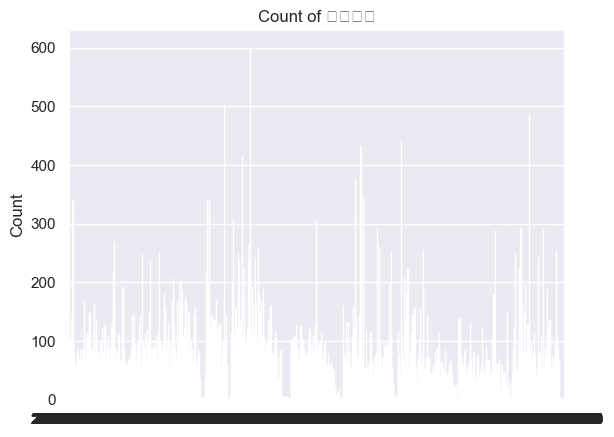

In [62]:
sns.set(style="darkgrid")

ax = sns.countplot(x="계약일자", data=df)

plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of 계약일자')

plt.show()

In [54]:
df.index

Index(['국유재산관리1팀',    '국유울산팀', '국유재산관리1팀', '국유재산관리1팀', '국유재산관리2팀', '국유재산관리2팀',
       '국유재산관리2팀',    '국유울산팀', '국유재산관리2팀', '국유재산관리2팀',
       ...
         '국유제주지사',   '국유제주지사',   '국유제주지사',   '국유제주지사',   '국유제주지사',   '국유제주지사',
         '국유제주지사',   '국유제주지사',   '국유제주지사',   '국유제주지사'],
      dtype='object', name='팀명', length=141317)